## Newton Fractal

Newton's method is used to find roots of a given equation $f(z)$ \
Find $z$ such that $f(z)=0$  \
$ z_{n+1} = z_{n} - \frac{f(z_n)}{{f}'(z_n)} $

More information can be found here:
- https://en.wikipedia.org/wiki/Newton_fractal
- https://en.wikipedia.org/wiki/Newton%27s_method
- https://mathworld.wolfram.com/NewtonsMethod.html

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### define function and parameters

In [2]:
def f(z):
    return z**3 - 2*z + 2

def df(z):
    return 3*z**2 - 2

# define size
# using top left and bottom right coordinates
img_size = ((0,0),(512,512))
frac_size = ((-2,-2),(2,2))
(frac_x0,frac_y0), (frac_x1,frac_y1) = frac_size
(img_x0,img_y0), (img_x1,img_y1) = img_size

# define parameters
tol = 0.001
maxIter = 13
frac_xStep = (frac_x1-frac_x0)/(img_x1-img_x0)
frac_yStep = (frac_y1-frac_y0)/(img_y1-img_y0)
params = {"tol":tol, "maxIter":maxIter, "frac_xStep":frac_xStep, "frac_yStep":frac_yStep}    

### test random values

In [3]:
z = np.random.uniform(frac_x0, frac_x1) + np.random.uniform(frac_y0, frac_y1)*1j

print("point:",z)

for i in range(1,1+params["maxIter"]):
  if abs(f(z)) < params["tol"] or np.isnan(z):
      break
  z -= f(z)/df(z)
  
if i < params["maxIter"]:
  if not np.isnan(z):
    print("converged to:",z)
    print("converged in",i,"steps")
    print("fvalue:",abs(f(z)))
    print("root:",(z.real), (z.imag), abs(z), ((z.real)**2+(z.imag)**2)**2 )
  else:
    print(print("escaped in",i,"steps"))  
else:
  print("did not converge in",i,"steps")
  print("fvalue:",abs(f(z)))
  print("root:",abs((z)))

point: (1.8703687520525363-1.6711477062092506j)
converged to: (0.884644511419065-0.5897390680755857j)
converged in 6 steps
fvalue: 1.3119490144590006e-05
root: 0.884644511419065 -0.5897390680755857 1.0631971030803915 1.2777772114027781


### plot fractal

In [4]:
def fracToImg(frac_size,img_size,point):
  (frac_x0,frac_y0), (frac_x1,frac_y1) = frac_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_x1 -= 1;  img_y1 -= 1

  x0, y0 = point
  x1 = round((x0-frac_x0)*(img_x1-img_x0)/(frac_x1-frac_x0) + img_x0)
  y1 = round((y0-frac_y0)*(img_y0-img_y1)/(frac_y1-frac_y0) + img_y1)
  return x1,y1

def plot_frac(frac_size,img_size,params):

  (frac_x0,frac_y0), (frac_x1,frac_y1) = frac_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_w = img_x1 - img_x0
  img_h = img_y1 - img_y0

  img = Image.new('HSV', (img_w, img_h), (0,0,0))
  for x in tqdm(np.arange(frac_x0, frac_x1+params["frac_xStep"], params["frac_xStep"])):    # have added step size to endpoints to include them
    for y in np.arange(frac_y0, frac_y1+params["frac_xStep"], params["frac_yStep"]):

      z = x+y*1j

      for i in range(params["maxIter"]):
        fval = f(z)
        if abs(fval) < params["tol"] or np.isnan(z):
            break
        z -= fval/df(z)
      if np.isnan(z):
        continue
      
      # color depends on the angle of the roots
      angle = (180 + np.angle(z, deg=True))/360   # [0,1]
      if angle < params["tol"]:
        angle = 1 - angle
      h = round(255*(angle))
      s = round(255*(1 - 1/(1+2*abs(z))))   # roots near origin should appear less saturated (white)
      v = round(255*( 1-i/(params["maxIter"]-1) ))  # points taking longer to converge should appear darker (black)
      # Plot the point
      img.putpixel( fracToImg(frac_size,img_size,(x, y)), (h,s,v) )

  return img.convert('RGB')

In [5]:
img = plot_frac(frac_size,img_size,params)
#img   # uncomment to show the PIL image

add axes

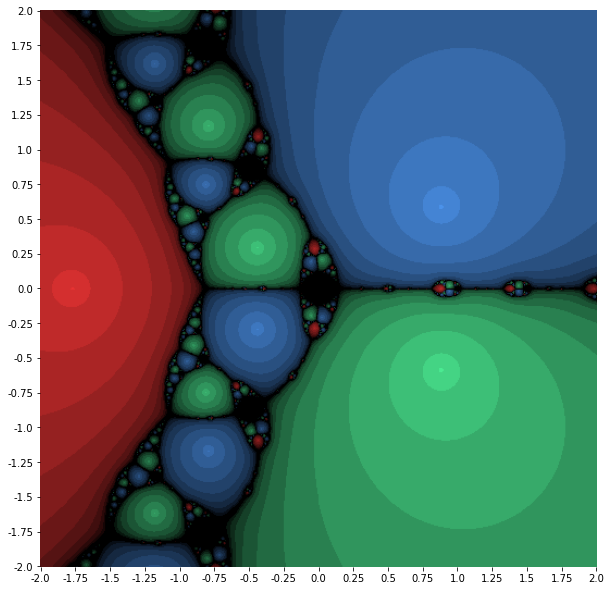

In [6]:
  image = np.asarray(img) # converting it to ndarray
  
  dpi = plt.rcParams['figure.dpi'] # get the default dpi value
  dpi=50
  fig_size = (img.size[0]/dpi, img.size[1]/dpi) # figure size

  fig, ax = plt.subplots(1, figsize=fig_size)
  ax.imshow(image)

  xlen = 2*len(ax.get_xticks())
  ylen = 2*len(ax.get_yticks())
  xlen += (xlen+1)%2; ylen += (ylen+1)%2
  xticks = np.linspace(img_x0,img_x1-1,xlen)
  yticks = np.linspace(img_y0,img_y1-1,ylen)
  xlabels = np.round(np.linspace(frac_x0,frac_x1,xlen),2)
  ylabels = np.round(np.linspace(frac_y1,frac_y0,ylen),2)

  ax.set_xticks(xticks)
  ax.set_xticklabels(xlabels)
  ax.set_yticks(yticks)
  ax.set_yticklabels(ylabels)

  ax.set_frame_on(False)